In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [28]:
df=pd.read_csv('Sales.csv')

In [29]:
#df.head(100)

In [30]:
df.shape

(998, 7)

In [31]:
df_new = df.pop('Price')
df['target']= df_new
df = df.rename(columns={'target':'Price'})


In [32]:
le=LabelEncoder()

In [33]:
df.drop(['Name','Country','City'],axis=1, inplace=True)

In [34]:
df['Payment_Type'] = le.fit_transform(df['Payment_Type'])


In [35]:
df['Price']= df['Price'].str.replace(',','')
df['Price'] = df['Price'].astype(int)

In [36]:
df['Longitude']=df['Longitude'].astype(str)
df['Longitude']= df['Longitude'].str.replace('-','')
df['Longitude'] = df['Longitude'].astype(float)

In [37]:
df['Latitude']=df['Latitude'].astype(str)
df['Latitude']= df['Latitude'].str.replace('-','')
df['Latitude'] = df['Latitude'].astype(float)

In [38]:
df.head()

,Payment_Type,Latitude,Longitude,Price
0,2,51.500000,1.116667,1200
1,3,39.195000,94.681940,1200
2,2,46.188060,123.830000,1200
3,3,36.133333,144.750000,1200
4,3,33.520560,86.802500,3600


In [39]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [40]:
len(x)

998

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 4 columns):
Payment_Type    998 non-null int64
Latitude        998 non-null float64
Longitude       998 non-null float64
Price           998 non-null int32
dtypes: float64(2), int32(1), int64(1)
memory usage: 27.4 KB


In [44]:
df.isnull().sum().sum()

0

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:

re=LinearRegression()


In [47]:
len(x_train)


798

In [58]:
re.fit(x_train,y_train)
y_pred=re.predict(x_test)

In [59]:
r2_score(y_test, y_pred)

-0.011445607847842654

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99, random_state=42)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [84]:
#x_train1

In [85]:
re.fit(x_train,y_train)
y_pred1=re.predict(x_test)

In [86]:
r2_score(y_test, y_pred1)

-0.010524322267533526

In [77]:
from sklearn.linear_model import LinearRegression
re_new=LinearRegression()

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [87]:
re.fit(x_train,y_train)
y_pred_new=re.predict(x_test)

In [88]:
r2_score(y_test,y_pred1)

-0.010524322267533526

In [100]:
y_view=pd.DataFrame(y_pred_new)
x_view=pd.DataFrame(x_train)
y_view=pd.DataFrame(y_train)


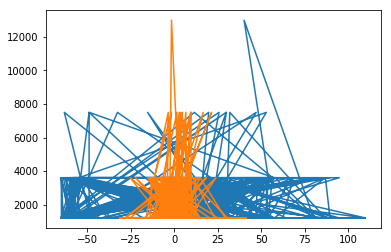

In [103]:
plt.plot(x_view,y_view)

In [105]:
from sklearn.manifold import TSNE

In [107]:
#x_train=TSNE(n_components=2).fit_transform(x_train)

In [108]:
data=df

In [109]:
sc=StandardScaler()
data_tes=sc.fit_transform(data)


In [116]:
data_train=TSNE(n_components=2, random_state=0)

In [123]:
train_mod=data_train.fit_transform(data_tes)
train_mod1=pd.DataFrame(train_mod)
train_mod1

,0,1
0,19.974825,34.300396
1,-1.534240,-19.875326
2,-17.181715,-3.823553
3,-1.000016,-12.173121
4,-41.039558,-9.621515
5,6.515288,-29.609781
6,-2.434344,9.784581
7,2.639622,7.373785
8,9.019666,1.988021
9,46.526169,2.813791


In [129]:
tsne_mod=pd.DataFrame(train_mod1,columns=('Dim1', 'Dim2'))

In [133]:
pl

NameError: name 'Dim1' is not defined